In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
airbnb=pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
#Print the Shape of the dataset
airbnb.shape

(48895, 16)

In [ ]:
airbnb.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Removing the Duplicates
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [ ]:
#Check for the null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
airbnb.name.value_counts()

Home away from home                        12
Loft Suite @ The Box House Hotel           11
Private Room                               10
Brooklyn Apartment                          9
New york Multi-unit building                8
                                           ..
1BR Avaliable in 3Br Condo                  1
UWS Duplex 3bdrm next to Central Pk         1
Spacious 4bdrm next to CentralPk            1
Luminous room                               1
Cozy Private Room in Bushwick, Brooklyn     1
Name: name, Length: 38253, dtype: int64

In [ ]:
airbnb.host_id.value_counts()

219517861    207
61391963      79
16098958      61
137358866     51
7503643       49
            ... 
6389984        1
68684053       1
60077920       1
9997184        1
74162901       1
Name: host_id, Length: 30232, dtype: int64

In [ ]:
print("host id with most row:",airbnb[airbnb["host_id"]==219517861].host_name.unique()[0])

host id with most row: Sonder (NYC)


In [ ]:
len(airbnb.host_name.unique())

9885

In [ ]:
airbnb.host_name.value_counts()

Michael           335
David             309
John              250
Alex              229
Sonder (NYC)      207
                 ... 
Krisztián           1
Kila                1
Maisha              1
Martin & Hande      1
Rusaa               1
Name: host_name, Length: 9885, dtype: int64

In [ ]:
airbnb[airbnb["host_name"]== "Michael"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47845,35945025,"LGBTQIA+ friendly 2 br in queer, artsy Bushwick",13750109,Michael,Brooklyn,Bushwick,40.70281,-73.93188,Entire home/apt,249,2,1,2019-07-01,1.00,1,17
48092,36076807,cozy apt in midtown,271393608,Michael,Manhattan,Hell's Kitchen,40.76725,-73.98669,Shared room,70,1,3,2019-06-30,3.00,6,24
48209,36139954,Best location in ny,271393608,Michael,Manhattan,Hell's Kitchen,40.76802,-73.98721,Shared room,69,1,1,2019-06-30,1.00,6,24
48211,36140236,Beautiful room near central park,271393608,Michael,Manhattan,Hell's Kitchen,40.76640,-73.98586,Shared room,69,1,1,2019-06-30,1.00,6,24


In [ ]:
airbnb.groupby("host_name").agg({"mean","min","max"}).T

host_name                                    'Cil  (Ari) HENRY LEE  \
id                             max   8.622301e+06     7.899658e+06   
                               mean  8.622301e+06     7.899658e+06   
                               min   8.622301e+06     7.899658e+06   
host_id                        max   4.535422e+07     4.060512e+07   
                               mean  4.535422e+07     4.060512e+07   
                               min   4.535422e+07     4.060512e+07   
latitude                       max   4.076914e+01     4.078938e+01   
                               mean  4.076914e+01     4.078938e+01   
                               min   4.076914e+01     4.078938e+01   
longitude                      max  -7.392118e+01    -7.394679e+01   
                               mean -7.392118e+01    -7.394679e+01   
                               min  -7.392118e+01    -7.394679e+01   
price                          max   1.200000e+02     1.400000e+02   
                               mean  1.200000e+02     1.400000e+02   
                               min   1.200000e+02     1.400000e+02   
minimum_nights                 max   2.000000e+00     7.000000e+00   
                               mean  2.000000e+00     7.000000e+00   
                               min   2.000000e+00     7.000000e+00   
number_of_reviews              max   2.400000e+02     3.000000e+00   
                               mean  2.400000e+02     3.000000e+00   
                               min   2.400000e+02     3.000000e+00   
reviews_per_month              max   5.220000e+00     6.000000e-02   
                               mean  5.220000e+00     6.000000e-02   
                               min   5.220000e+00     6.000000e-02   
calculated_host_listings_count max   1.000000e+00     1.000000e+00   
                               mean  1.000000e+00     1.000000e+00   
                               min   1.000000e+00     1.000000e+00   
availability_365               max   2.980000e+02     5.600000e+01   
                               mean  2.980000e+02     5.600000e+01   
                               min   2.980000e+02     5.600000e+01   

host_name                            (Email hidden by Airbnb)   (Mary) Haiy  \
id                             max               2.790303e+07  1.562879e+07   
                               mean              1.130008e+07  1.562879e+07   
                               min               2.281147e+06  1.562879e+07   
host_id                        max               6.552700e+07  1.007572e+08   
                               mean              1.955866e+07  1.007572e+08   
                               min               5.610823e+06  1.007572e+08   
latitude                       max               4.079610e+01  4.063461e+01   
                               mean              4.074740e+01  4.063461e+01   
                               min               4.068274e+01  4.063461e+01   
longitude                      max              -7.396300e+01 -7.402451e+01   
                               mean             -7.397860e+01 -7.402451e+01   
                               min              -7.400428e+01 -7.402451e+01   
price                          max               2.610000e+02  1.260000e+02   
                               mean              1.880000e+02  1.260000e+02   
                               min               9.000000e+01  1.260000e+02   
minimum_nights                 max               5.000000e+00  1.000000e+00   
                               mean              2.600000e+00  1.000000e+00   
                               min               1.000000e+00  1.000000e+00   
number_of_reviews              max               6.000000e+01  1.880000e+02   
                               mean              1.500000e+01  1.880000e+02   
                               min               1.000000e+00  1.880000e+02   
reviews_per_month              max               2.910000e+00  5.810000e+00   
            

In [ ]:
airbnb.number_of_reviews.agg({"min","max"})

max    629
min      1
Name: number_of_reviews, dtype: int64

In [ ]:
airbnb[airbnb.number_of_reviews==airbnb.number_of_reviews.max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


In [ ]:
airbnb.groupby("neighbourhood_group").agg("max")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,36442252,⭐️Walk + Transit Score 97⭐️8min to Yankee Std⭐️,273841667,Zoraida,Woodlawn,40.91306,-73.78158,Shared room,800,186,321,2019-07-07,10.34,13,365
Brooklyn,36455809,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,272327753,소정,Windsor Terrace,40.73890,-73.85676,Shared room,10000,999,488,2019-07-08,14.00,103,365
Manhattan,36425863,️CENTRALLY LOCATED️- Great for Families + Groups,273361532,빈나,West Village,40.87665,-73.90855,Shared room,9999,1250,607,2019-07-08,58.50,327,365
Queens,36427429,한성 韓城 Han C (2F),272872092,美德,Woodside,40.79721,-73.71299,Shared room,10000,500,629,2019-07-08,20.94,103,365
Staten Island,36438336,幸福小屋,272557707,Yuriy,Willowbrook,40.64779,-74.06356,Shared room,625,33,333,2019-07-08,10.12,8,365


In [ ]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [ ]:
airbnb['neighbourhood'].value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
Holliswood               2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [ ]:
airbnb[airbnb.reviews_per_month==airbnb.reviews_per_month.max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [ ]:
airbnb[airbnb.reviews_per_month==airbnb.reviews_per_month.min()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
355,98330,LOVELY APARTMENT IN THE HEART OF NY,31374,Shon,Manhattan,Kips Bay,40.73877,-73.97707,Entire home/apt,125,4,1,2012-01-03,0.01,3,181
608,229874,Oversized Studio in Park Slope,507304,Derrick,Brooklyn,Sunset Park,40.66293,-73.99833,Entire home/apt,200,5,1,2012-01-02,0.01,1,0
613,231414,TURQUOISE: One-Bedroom Apt. in Soho,1184442,Roberto,Manhattan,SoHo,40.72599,-74.00168,Private room,270,5,1,2013-07-09,0.01,1,210
741,268481,Resort-like living in Williamsburg,1380703,Vishal,Brooklyn,Williamsburg,40.71647,-73.93974,Entire home/apt,290,30,1,2013-09-24,0.01,1,0
783,281521,Amazing West Village 2br,70614,Vimal,Manhattan,West Village,40.73879,-74.00425,Entire home/apt,200,27,1,2012-10-02,0.01,1,0
798,285442,Huge room with private balcony,1475866,Jesper,Manhattan,East Village,40.73119,-73.98819,Private room,300,6,1,2013-05-06,0.01,1,0
871,311003,"2 BD / 2BA WITH GARDEN, SLEEPS 6",72747,Karen,Brooklyn,Crown Heights,40.67679,-73.95639,Entire home/apt,225,4,1,2013-04-21,0.01,1,342


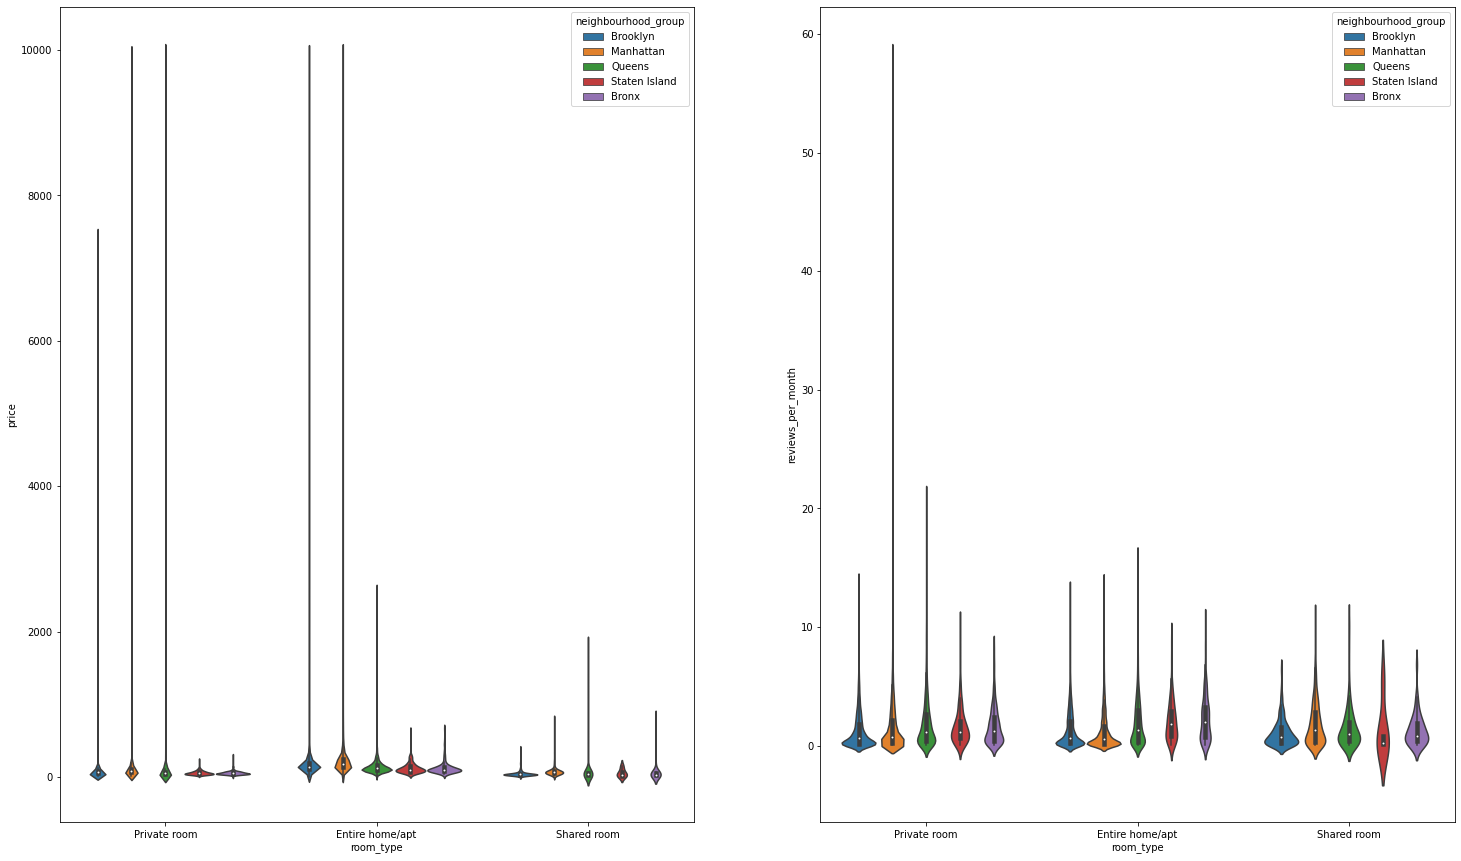

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(121)
sns.violinplot("room_type","price",hue="neighbourhood_group",data=airbnb)

plt.subplot(122)
sns.violinplot("room_type","reviews_per_month",hue="neighbourhood_group",data=airbnb)


In [ ]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

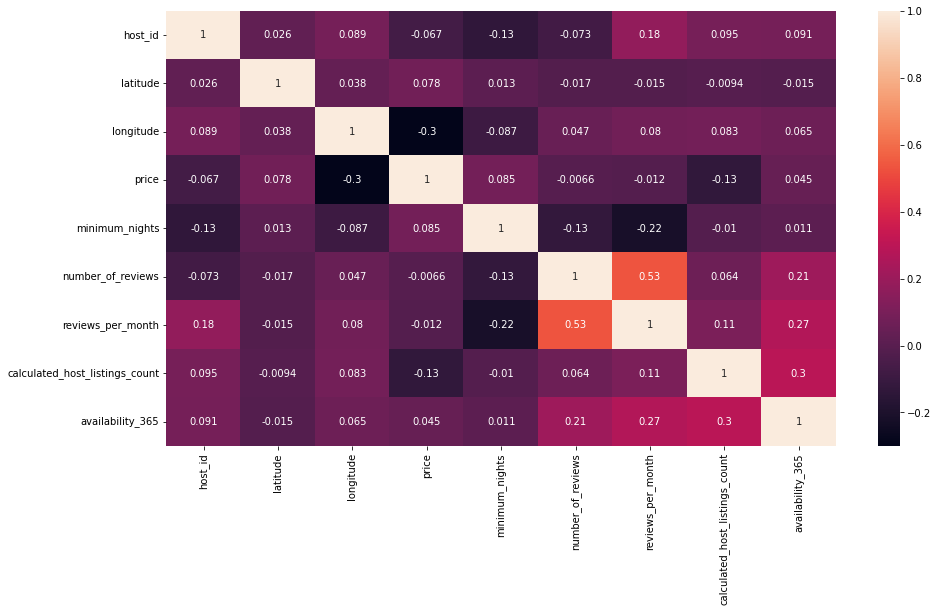

In [ ]:
# Correlation between different variables
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [ ]:
airbnb.shape


(38821, 12)

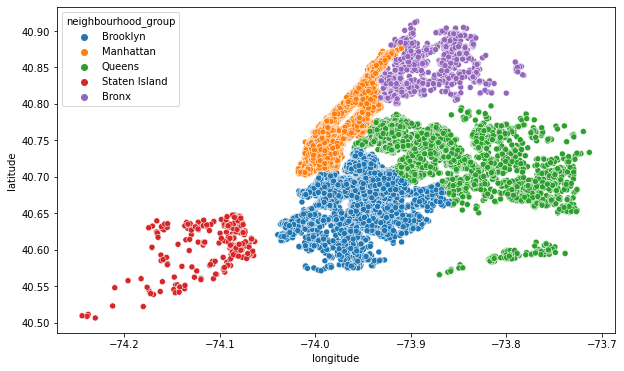

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

Text(0.5, 1.0, 'Neighbourhood Group')

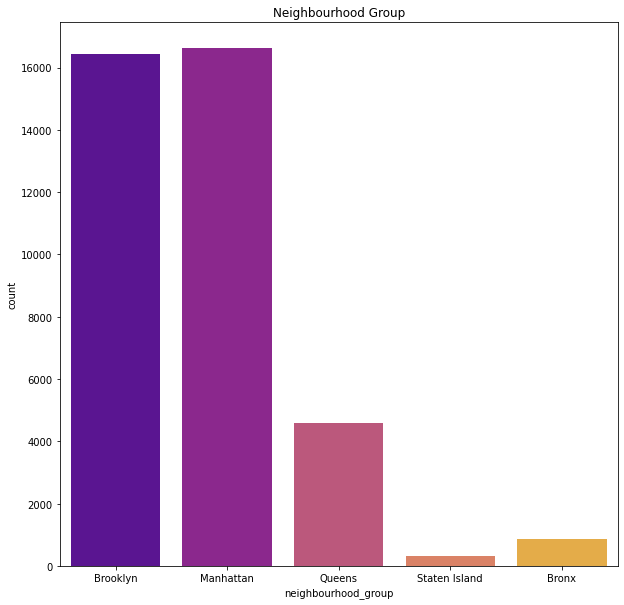

In [ ]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

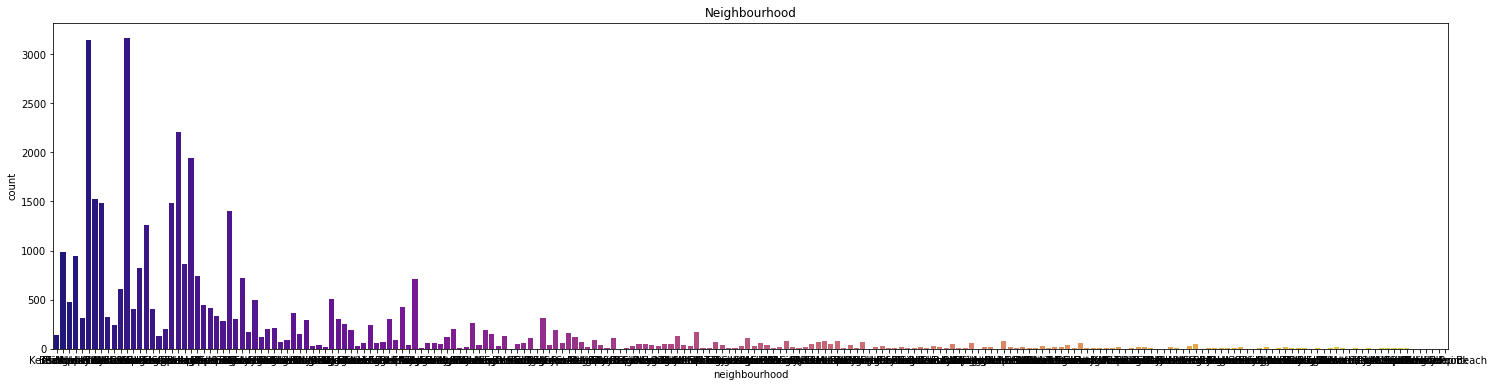

In [ ]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

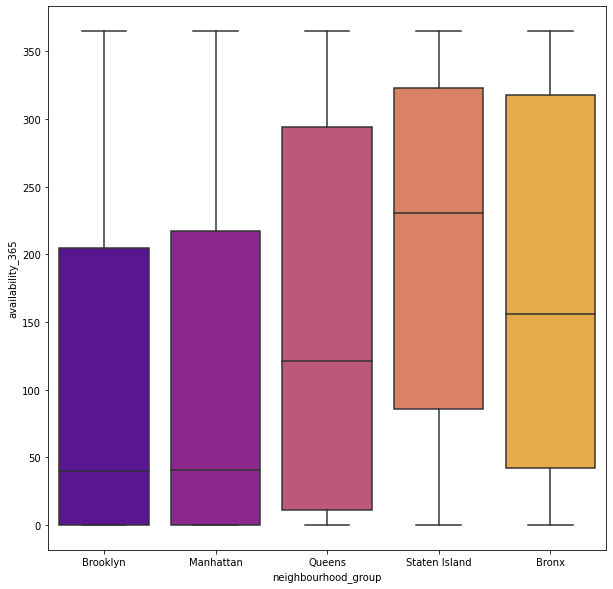

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

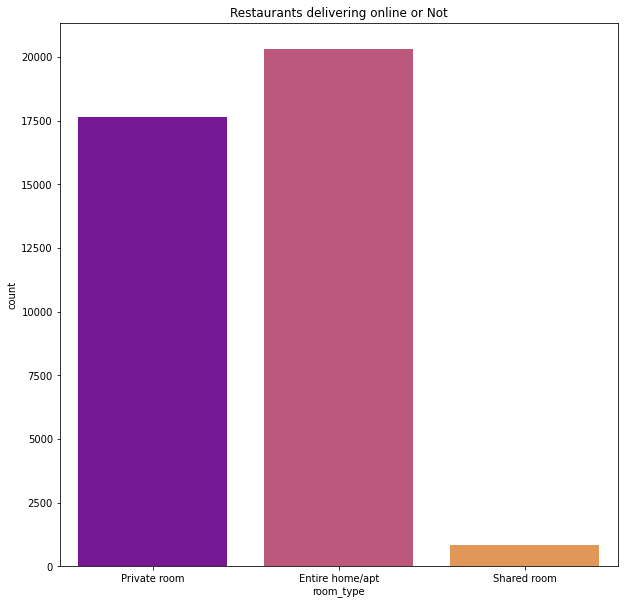

In [ ]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')


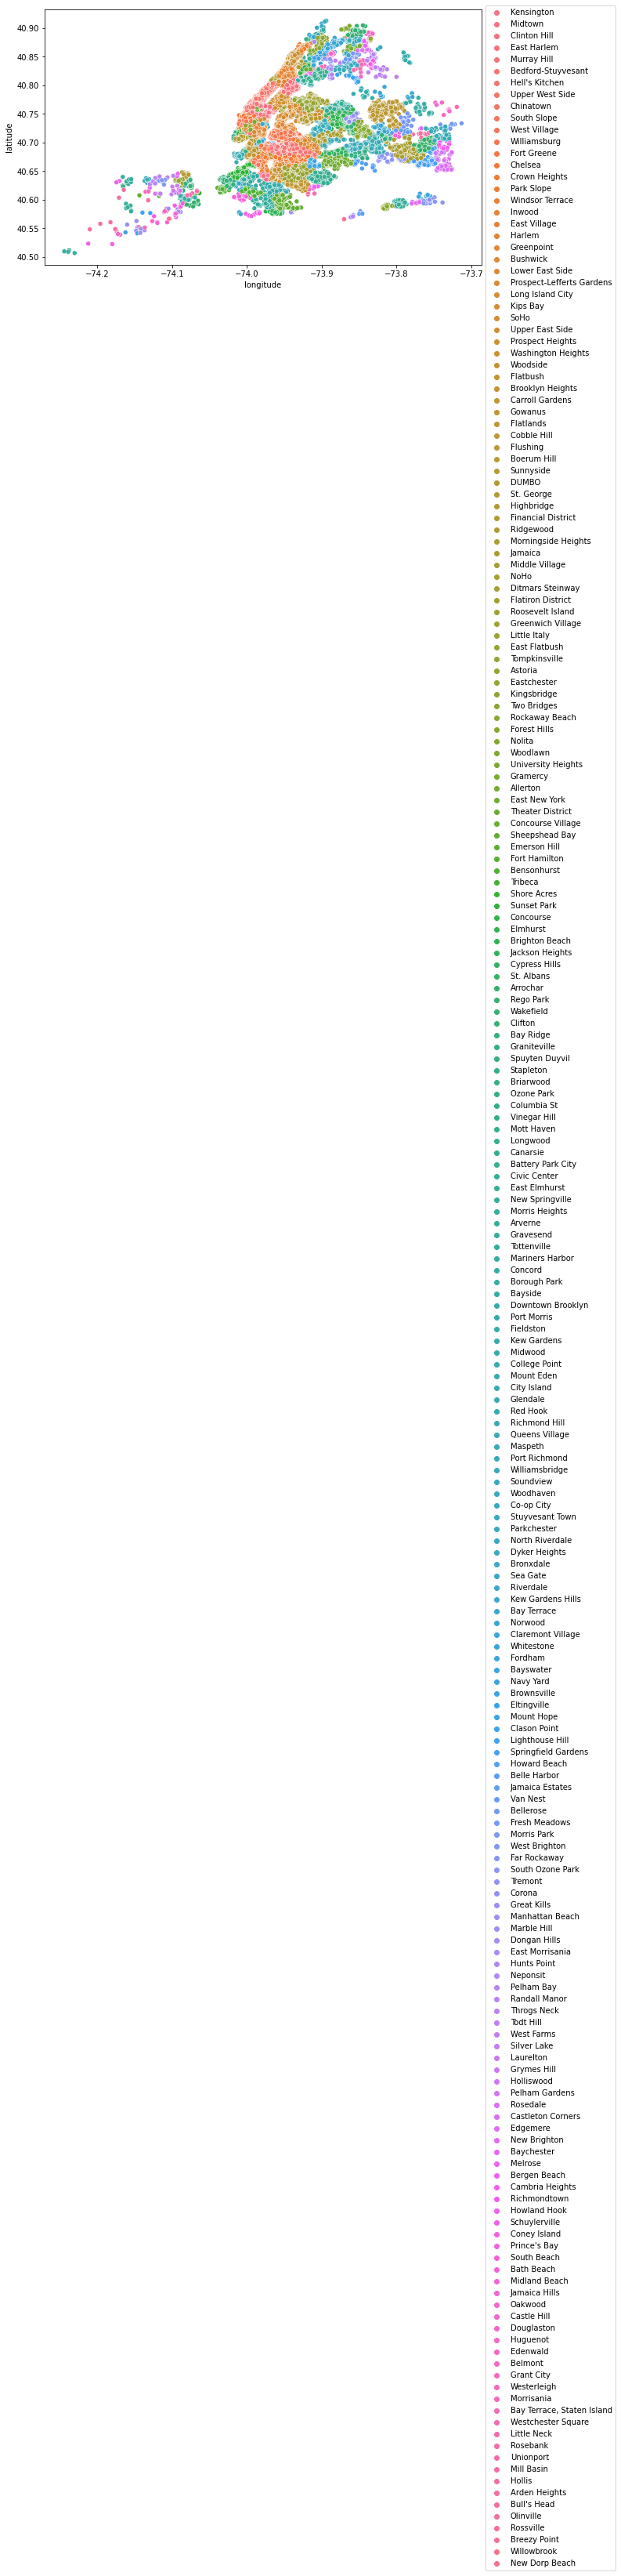

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.legend(bbox_to_anchor=(1,1.03))
plt.ioff()

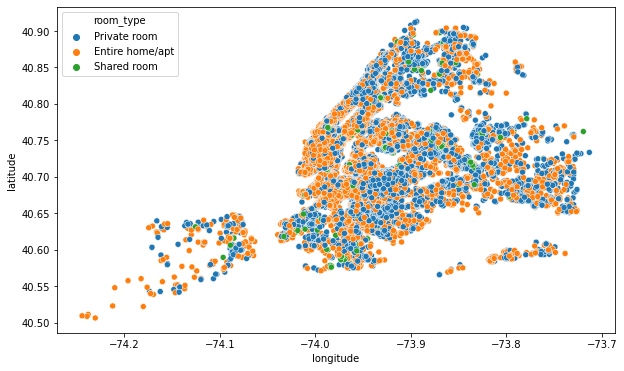

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

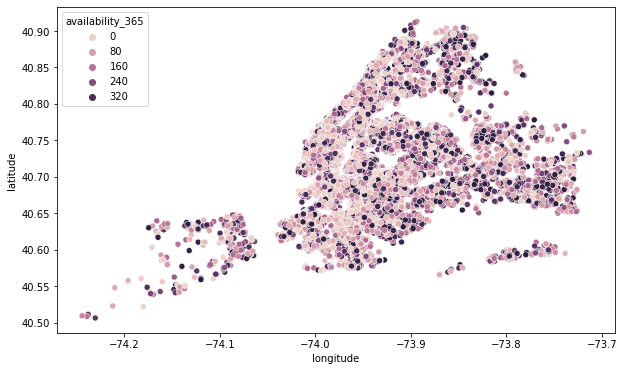

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

In [ ]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
5,Manhattan,Entire home/apt,200,3,1,129


In [ ]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

In [ ]:
airbnb_en = Encode(airbnb.copy())


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

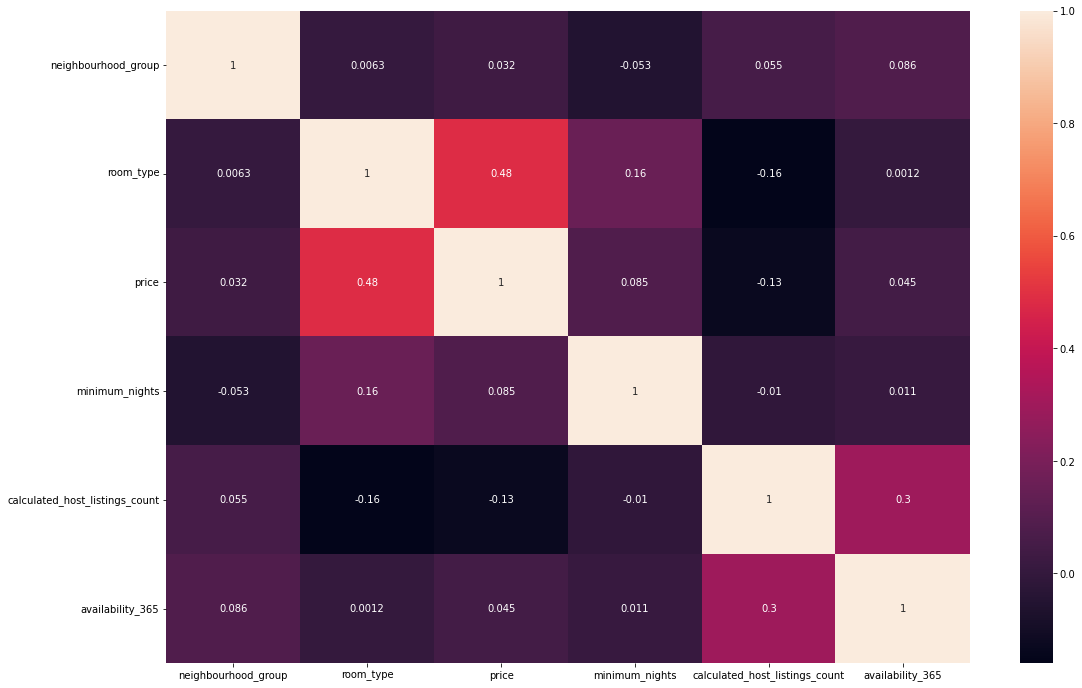

In [ ]:
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [ ]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x=airbnb_en.drop("price",axis=1)
y=airbnb_en.price

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=42)

In [ ]:
reg = LinearRegression()

lasso = Lasso()



ridge = Ridge()

DTree = DecisionTreeRegressor(min_samples_leaf=.0001)

In [ ]:
model_list = [reg , lasso , ridge , DTree]


for model in model_list:
  model.fit(x_train,y_train)

  print("train score: ",model.score(x_train,y_train), ", test_score: ",model.score(x_test,y_test), "\n")

  y_pred = pd.Series(model.predict(x_test))
  print("ERORR: ",mean_squared_error(y_test,y_pred))
  print("\n","*_*"*50,"\n")

train score:  0.058939943494419 , test_score:  0.10161971850153251 

ERORR:  21582.03035369732

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

train score:  0.05882146216256623 , test_score:  0.10141694733593098 

ERORR:  21586.9015797705

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

train score:  0.05893994298545979 , test_score:  0.10161949587109498 

ERORR:  21582.03570200801

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

train score:  0.3250444830153735 , test_score:  0.018980841017967487 

ERORR:  23567.286262554684

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*